In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')
tags = pd.read_csv('tags.csv')
links = pd.read_csv('links.csv')

In [33]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [34]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [35]:
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [36]:
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [37]:
movies.shape

(9742, 3)

In [38]:
ratings.shape

(100836, 4)

In [39]:

# Count the number of unique userId
unique_user_ids = ratings['userId'].nunique()

print(f'The number of unique userId is: {unique_user_ids}')


The number of unique userId is: 610


In [40]:


# Group by movieId and count the number of ratings
rating_counts = ratings.groupby('movieId').size().reset_index(name='rating_count')

# Find the movie with the maximum ratings
max_ratings_movie = rating_counts.loc[rating_counts['rating_count'].idxmax()]

# Merge to get the movie title
max_rated_movie = movies[movies['movieId'] == max_ratings_movie['movieId']]['title'].values[0]

print(f"The movie with the maximum number of ratings is: {max_rated_movie}")


The movie with the maximum number of ratings is: Forrest Gump (1994)


In [41]:

# Find the movieId for "Matrix, The (1999)"
matrix_movie_id = movies[movies['title'] == "Matrix, The (1999)"]['movieId'].values[0]

# Filter the tags for "Matrix, The (1999)"
matrix_tags = tags[tags['movieId'] == matrix_movie_id]['tag'].unique()

print(f"Tags for 'Matrix, The (1999)': {matrix_tags}")



Tags for 'Matrix, The (1999)': ['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


In [42]:

t2_movie_id = movies[movies['title'] == "Terminator 2: Judgment Day (1991)"]['movieId'].values[0]

# Filter the ratings for this movie
t2_ratings = ratings[ratings['movieId'] == t2_movie_id]

# Calculate the average rating
average_rating = t2_ratings['rating'].mean()

print(f"Average rating for 'Terminator 2: Judgment Day (1991)': {average_rating}")


Average rating for 'Terminator 2: Judgment Day (1991)': 3.970982142857143


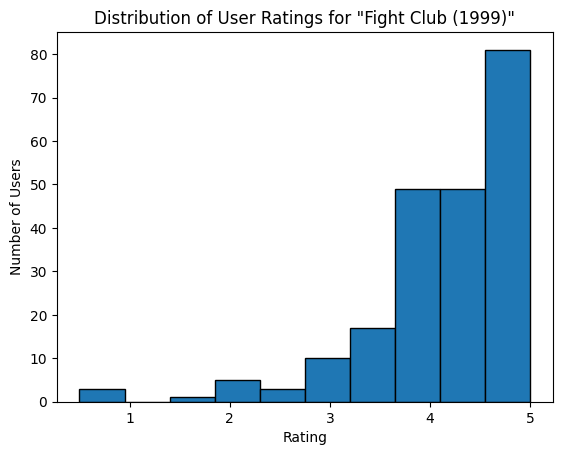

In [43]:


# Find the movieId for "Fight Club (1999)"
fc_movie_id = movies[movies['title'] == "Fight Club (1999)"]['movieId'].values[0]

# Filter the ratings for this movie
fc_ratings = ratings[ratings['movieId'] == fc_movie_id]

# Plot the distribution of ratings
plt.hist(fc_ratings['rating'], bins=10, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Number of Users')
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.show()


In [44]:


# Group ratings by movieId and compute the count and mean of ratings
ratings_grouped = ratings.groupby('movieId').agg({'rating': ['mean', 'count']})
ratings_grouped.columns = ['mean_rating', 'rating_count']

# Filter movies with more than 50 ratings
filtered_movies = ratings_grouped[ratings_grouped['rating_count'] > 50]

# Merge with movies dataset to get movie titles
filtered_movies = filtered_movies.merge(movies, on='movieId')

# Find the movie with the highest average rating
most_popular_movie = filtered_movies.loc[filtered_movies['mean_rating'].idxmax()]

print(f"The most popular movie based on average user ratings is: {most_popular_movie['title']} with an average rating of {most_popular_movie['mean_rating']:.2f}")


The most popular movie based on average user ratings is: Shawshank Redemption, The (1994) with an average rating of 4.43


In [45]:


# Group ratings by movieId and count the number of ratings
ratings_grouped = ratings.groupby('movieId').agg({'rating': 'count'})
ratings_grouped.columns = ['rating_count']

# Filter movies with more than 50 ratings
filtered_movies = ratings_grouped[ratings_grouped['rating_count'] > 50]

# Merge with movies dataset to get movie titles
filtered_movies = filtered_movies.merge(movies, on='movieId')

# Sort by rating count in descending order
filtered_movies = filtered_movies.sort_values(by='rating_count', ascending=False)

# Select the top 5 popular movies
top_5_movies = filtered_movies.head(5)

print("Top 5 popular movies based on the number of user ratings:")
print(top_5_movies[['title', 'rating_count']])


Top 5 popular movies based on the number of user ratings:
                                title  rating_count
61                Forrest Gump (1994)           329
53   Shawshank Redemption, The (1994)           317
49                Pulp Fiction (1994)           307
99   Silence of the Lambs, The (1991)           279
248                Matrix, The (1999)           278


In [46]:


# Group ratings by movieId and compute the count and mean of ratings
ratings_grouped = ratings.groupby('movieId').agg({'rating': ['mean', 'count']})
ratings_grouped.columns = ['mean_rating', 'rating_count']

filtered_movies = ratings_grouped[ratings_grouped['rating_count'] > 50]

filtered_movies = filtered_movies.merge(movies, on='movieId')

# Filter Sci-Fi movies
sci_fi_movies = filtered_movies[filtered_movies['genres'].str.contains('Sci-Fi')]

sorted_sci_fi_movies = sci_fi_movies.sort_values(by='rating_count', ascending=False)
third_most_popular_sci_fi = sorted_sci_fi_movies.iloc[2]

print(f"The third most popular Sci-Fi movie based on the number of user ratings is: {third_most_popular_sci_fi['title']} with {third_most_popular_sci_fi['rating_count']} ratings")


The third most popular Sci-Fi movie based on the number of user ratings is: Jurassic Park (1993) with 238 ratings


In [47]:


# Merge movies with links dataset
merged_data = pd.merge(movies, links, on='movieId')


if 'imdbId' in merged_data.columns:
    highest_imdb_rating_movie = merged_data.loc[merged_data['imdbId'].idxmax()]
    print(f"The movie with the highest IMDb rating is '{highest_imdb_rating_movie['title']}' with IMDb rating {highest_imdb_rating_movie['imdbId']} and movieId {highest_imdb_rating_movie['movieId']}")
else:
    print("IMDb rating column not found in the combined dataset.")


The movie with the highest IMDb rating is 'Bungo Stray Dogs: Dead Apple (2018)' with IMDb rating 8391976 and movieId 193587


In [48]:


# Merge movies with links dataset
merged_data = pd.merge(movies, links, on='movieId')


sci_fi_movies = merged_data[merged_data['genres'].str.contains('Sci-Fi')]

if 'imdbId' in sci_fi_movies.columns:
    highest_imdb_rating_sci_fi_movie = sci_fi_movies.loc[sci_fi_movies['imdbId'].idxmax()]
    print(f"The Sci-Fi movie with the highest IMDb rating is '{highest_imdb_rating_sci_fi_movie['title']}' with IMDb rating {highest_imdb_rating_sci_fi_movie['imdbId']} and movieId {highest_imdb_rating_sci_fi_movie['movieId']}")
else:
    print("IMDb rating column not found in the dataset.")


The Sci-Fi movie with the highest IMDb rating is '2048: Nowhere to Run (2017)' with IMDb rating 7387408 and movieId 179053
